## Fetch MLdata


In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist= fetch_openml('mnist_784')

In [3]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [4]:
x, y= mnist['data'] , mnist['target']

In [5]:
x[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
x.shape

(70000, 784)

In [8]:
%matplotlib inline
import matplotlib

In [9]:
import matplotlib.pyplot as plt

In [10]:
some_digit = x[36001]
some_digit_image = some_digit.reshape(28 , 28)

(-0.5, 27.5, 27.5, -0.5)

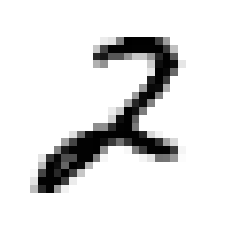

In [11]:
plt.imshow(some_digit_image , cmap=matplotlib.cm.binary , interpolation='nearest')
plt.axis("off")

In [12]:
y[20000]

'5'

In [13]:
x_train , x_test = x[:60000] , x[60000:]

In [14]:
y_train ,y_test = y[:60000] , y[60000:]

In [15]:
import numpy as np
shuffle_index= np.random.permutation(60000)

In [16]:
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)

In [17]:
x_train , y_train = x_train[shuffle_index] ,y_train[shuffle_index]

In [18]:
y_train_3 = (y_train!=3)
y_test_3 = (y_test!=3)

In [19]:
y_train_3 

array([ True, False,  True, ...,  True,  True,  True])

## Logistics Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
classifier =LogisticRegression(tol = 0.1 , solver='lbfgs')

In [22]:
classifier.fit(x_train ,y_train_3  )

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [23]:
classifier.predict([x[36001]])

array([ True])

In [24]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(classifier,x_train , y_train_3 , cv=3 )

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [25]:
a

array([0.9728 , 0.9718 , 0.97305])

In [26]:
from sklearn.model_selection import cross_val_predict
y_train_predict=cross_val_predict(classifier,x_train , y_train_3 , cv=3 )

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [27]:
y_train_predict

array([ True, False,  True, ...,  True,  True,  True])

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_train_3,y_train_predict)

array([[ 5134,   997],
       [  650, 53219]], dtype=int64)

In [30]:
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

In [31]:
confusion_matrix(y_train_3,y_train_3)

array([[ 6131,     0],
       [    0, 53869]], dtype=int64)

In [32]:
 precision_score(y_train_3,y_train_predict)

0.9816105946584034

In [33]:
recall_score(y_train_3,y_train_predict)

0.9879336909911081

In [34]:
f1_score(y_train_3,y_train_predict)

0.9847619928759772

## Precision Recall Curve

In [35]:
from sklearn.metrics import precision_recall_curve

In [36]:
y_score= cross_val_predict(classifier,x_train , y_train_3 , cv=3 ,method="decision_function" )

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [37]:
precisions, recalls, thersholds = precision_recall_curve(y_train_3,y_score)

In [38]:
precisions

array([0.90000668, 0.90000501, 0.90002005, ..., 1.        , 1.        ,
       1.        ])

In [39]:
recalls

array([1.00000000e+00, 9.99981436e-01, 9.99981436e-01, ...,
       3.71271046e-05, 1.85635523e-05, 0.00000000e+00])

In [40]:
thersholds

array([-8.98607087, -8.98515689, -8.98366362, ..., 43.28467518,
       44.70072882, 48.73166768])

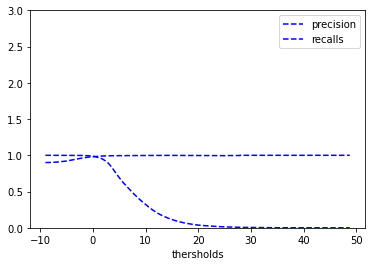

In [41]:
plt.plot(thersholds , precisions[:-1] , "b--" , label="precision")
plt.plot(thersholds , recalls[:-1]  ,"b--" , label="recalls")
plt.xlabel('thersholds')
plt.legend(loc="best")
plt.ylim([0,3])
plt.show()

## keras


In [42]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline

In [43]:
(x_train,y_train),(x_test,y_test)= keras.datasets.mnist.load_data()

In [44]:
len(x_train)

60000

In [45]:
len(x_test)

10000

In [46]:
x_train[0].shape

(28, 28)

In [64]:
x_train= x_train/255
x_test = x_test /255

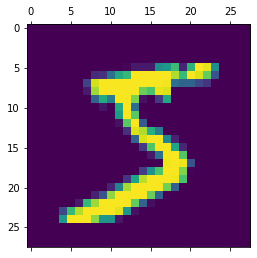

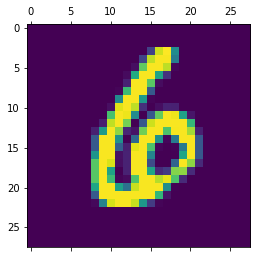

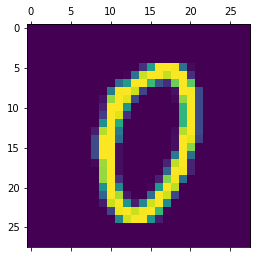

In [65]:
plt.matshow(x_train[0])
plt.matshow(x_train[93])
plt.matshow(x_train[1000])

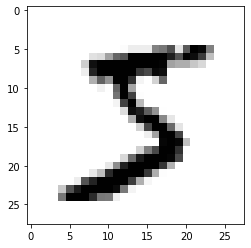

In [66]:
plt.imshow(x_train[0], cmap=matplotlib.cm.binary ,interpolation='nearest')

In [67]:
x_train_flat=x_train.reshape(len(x_train), 28*28)

In [68]:
x_test_flat=x_test.reshape(len(x_test), 28*28)

## Activation sigmoid

In [85]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

In [86]:
model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics='accuracy')

In [87]:
model.fit(x_train_flat, y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7359 - accuracy: 0.8074
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3111 - accuracy: 0.9130
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2781 - accuracy: 0.9224
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2767 - accuracy: 0.9229
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2647 - accuracy: 0.9262


In [88]:
model.fit(x_train_flat, y_train , epochs=8)

Epoch 1/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2620 - accuracy: 0.9265
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2580 - accuracy: 0.9286
Epoch 3/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2559 - accuracy: 0.9287
Epoch 4/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2533 - accuracy: 0.9304
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2508 - accuracy: 0.9304
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2490 - accuracy: 0.9310
Epoch 7/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2478 - accuracy: 0.9316
Epoch 8/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2464 - accuracy: 0.9319


In [72]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2738 - accuracy: 0.9239


[0.27375397086143494, 0.9239000082015991]

In [73]:
y_predicted= model.predict(x_test_flat)

In [74]:
y_predicted[0]

array([4.5875967e-02, 4.2477461e-07, 7.1467012e-02, 9.6317863e-01,
       3.0345023e-03, 8.1519216e-02, 2.0353532e-06, 9.9974132e-01,
       7.6924056e-02, 6.5356648e-01], dtype=float32)

## prediction

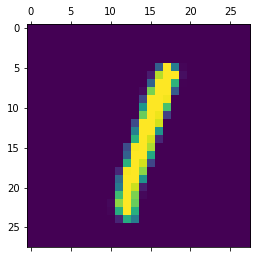

In [75]:
plt.matshow(x_test[5])

In [76]:
y_predicted[5]

array([9.2670627e-05, 9.9806738e-01, 4.6325397e-01, 4.5508879e-01,
       1.0140866e-02, 1.6974419e-02, 1.2763947e-02, 6.1050010e-01,
       5.0374538e-01, 1.4678770e-01], dtype=float32)

In [77]:
np.argmax(y_predicted[5])

1

In [78]:
y_predicted=[np.argmax(i) for i in y_predicted]

In [79]:
new=tf.math.confusion_matrix(labels=y_test , predictions=y_predicted)

In [80]:
import seaborn as sns

Text(69.0, 0.5, 'Truth')

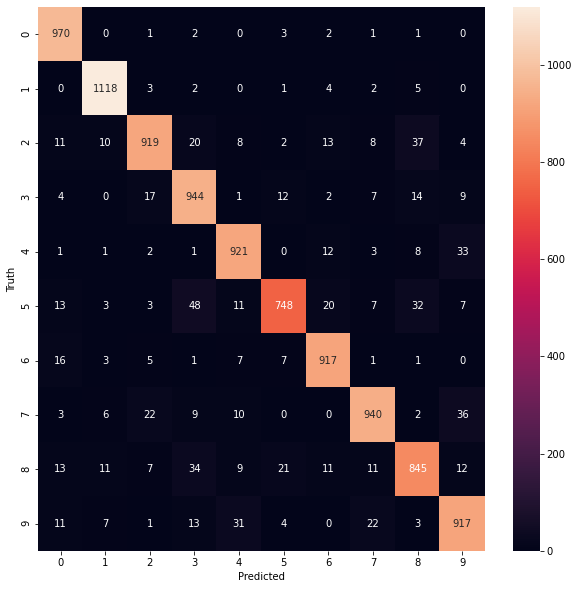

In [81]:
plt.figure(figsize=(10,10))
sns.heatmap(new, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Activation , Hidden Layer

In [94]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics='accuracy')
model.fit(x_train, y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8043 - accuracy: 0.7741
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2890 - accuracy: 0.9191
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2614 - accuracy: 0.9273
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2477 - accuracy: 0.9299
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2349 - accuracy: 0.9348


In [95]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics='accuracy')
model.fit(x_train, y_train , epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8526 - accuracy: 0.7471
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3128 - accuracy: 0.9111
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2918 - accuracy: 0.9180
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2654 - accuracy: 0.9232
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2554 - accuracy: 0.9273
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2519 - accuracy: 0.9302
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2358 - accuracy: 0.9339
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2328 - accuracy: 0.9333
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2313 - accuracy: 0.9351
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.225